#### Import the Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
# read the CSV file
df_por = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/445 project/dataset- por/por.csv")

### EDA

Analysis of the attribues

In [3]:
df_por.shape

(649, 33)

In [4]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


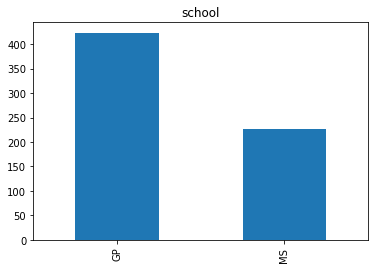

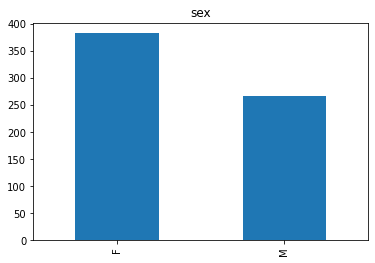

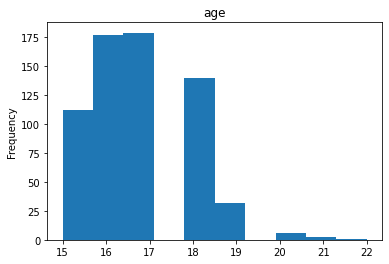

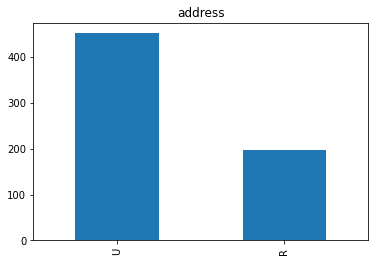

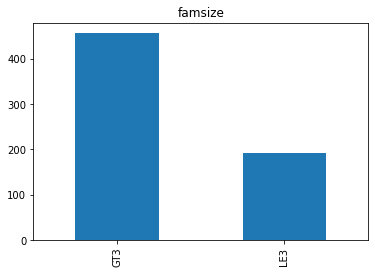

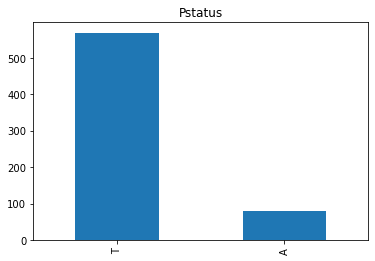

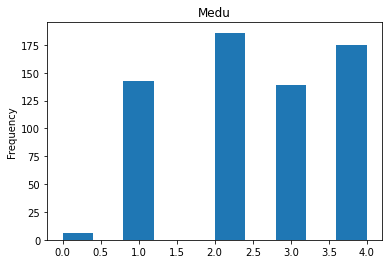

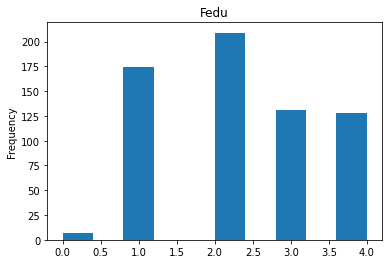

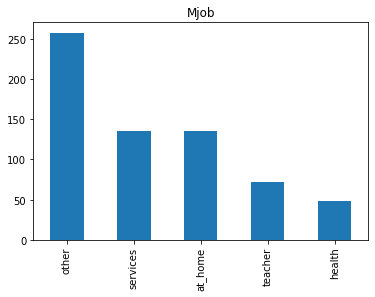

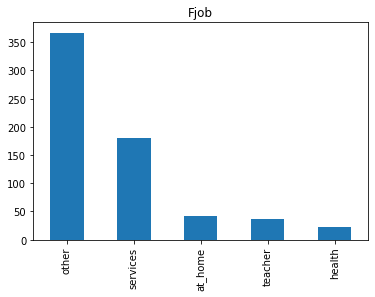

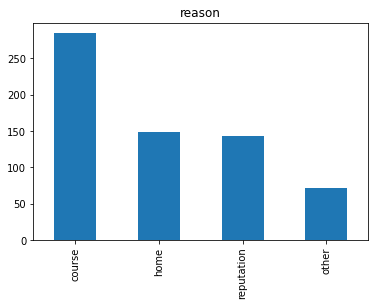

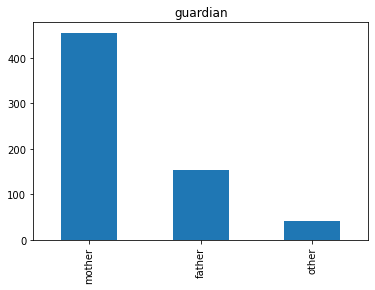

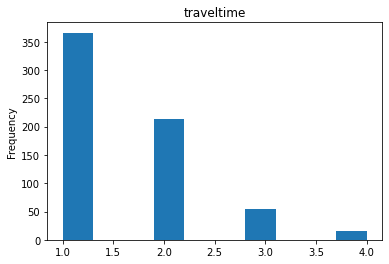

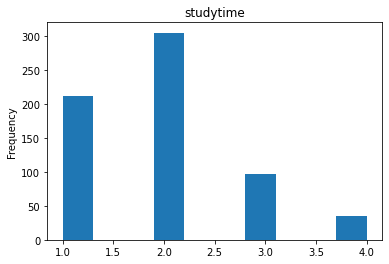

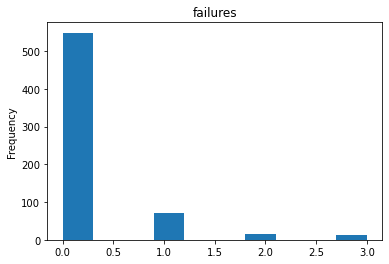

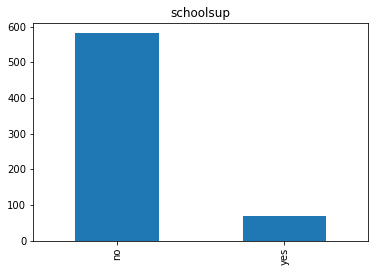

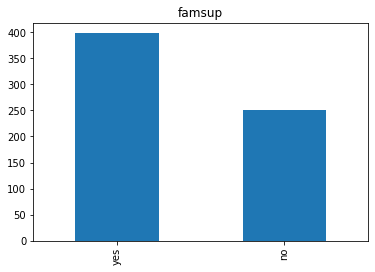

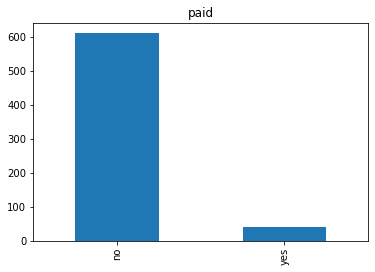

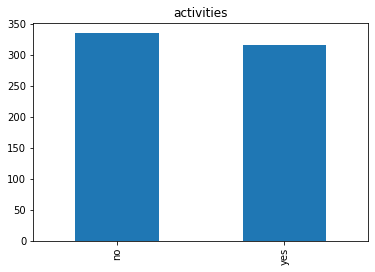

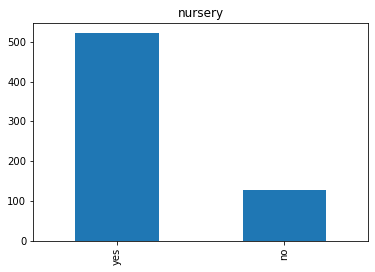

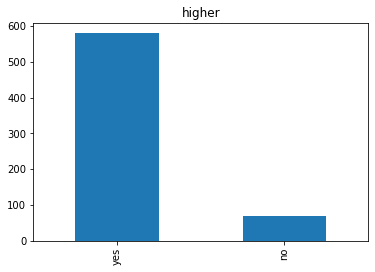

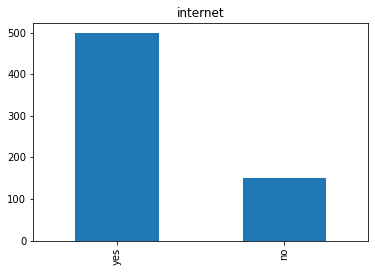

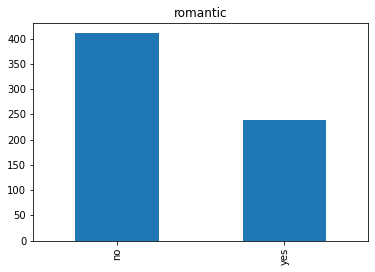

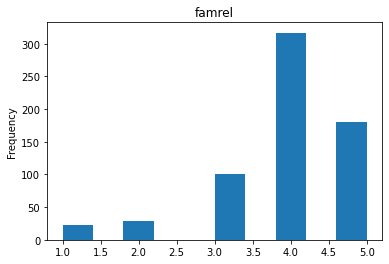

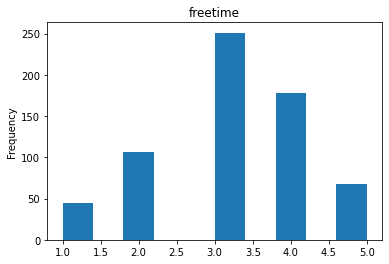

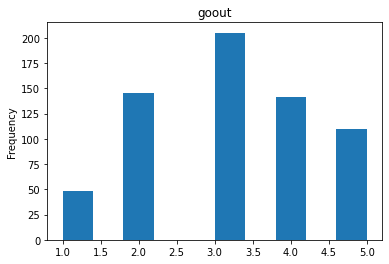

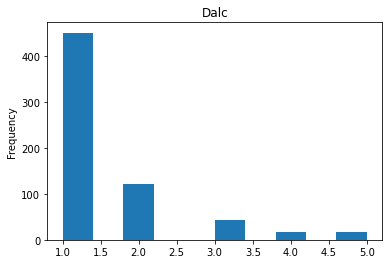

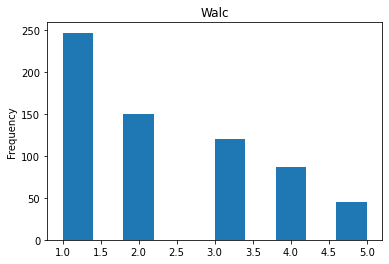

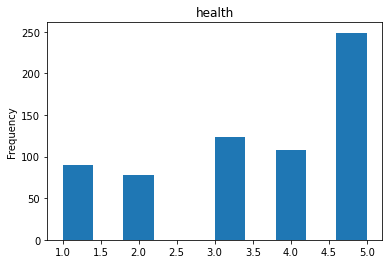

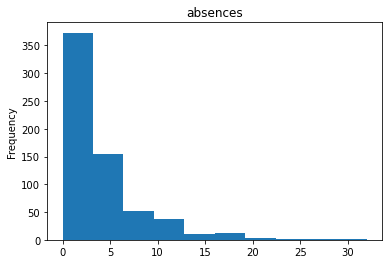

In [7]:
# plotting bar graphs numerical columns and histoplots for categorical coloumns
for column in df_por.columns[:-3]:
    # check if the column is numerical.
    if df_por[column].dtype == np.dtype('int64') or df_por[column].dtype == np.dtype('float64'):
        df_por[column].plot.hist()
        plt.title(column)
        plt.show()
    else:
        df_por[column].value_counts().plot.bar()
        plt.title(column)
        plt.show()


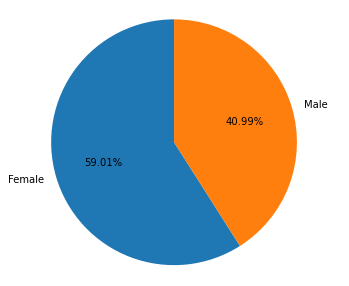

In [8]:
# pie chart to analyse gender
f, ax = plt.subplots(figsize=(6, 5))
plt.pie(df_por['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], 
        autopct='%2.2f%%', startangle=90)
axis = plt.axis('equal')

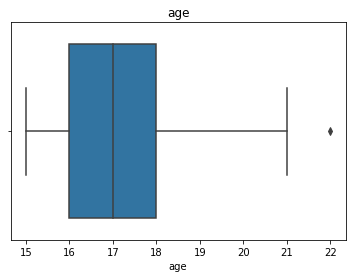

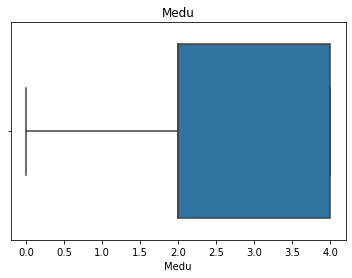

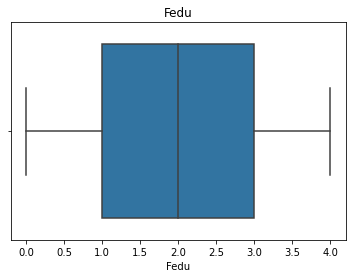

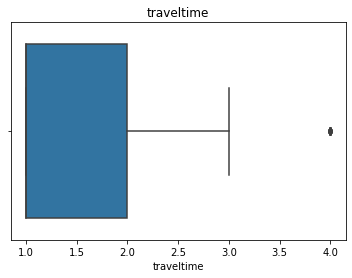

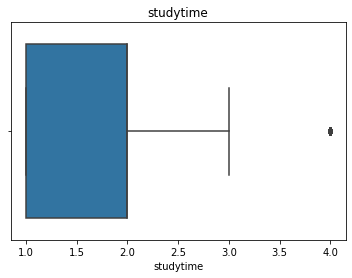

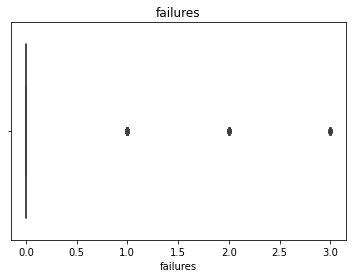

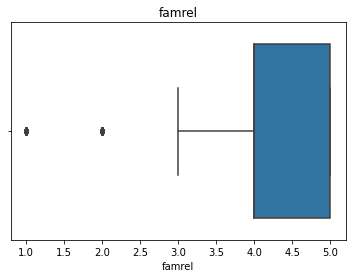

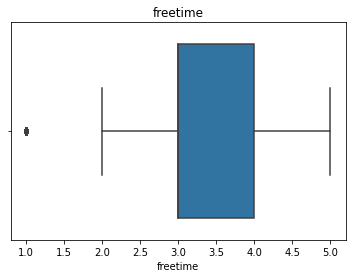

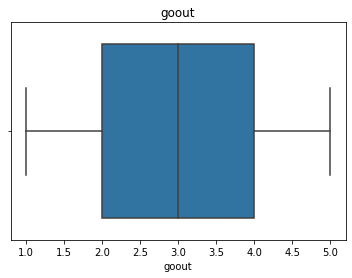

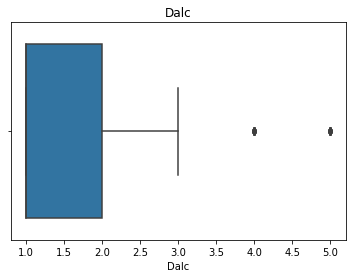

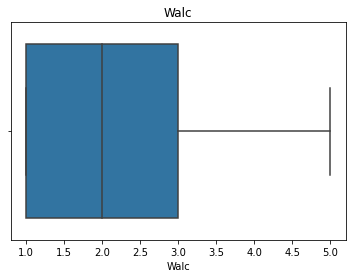

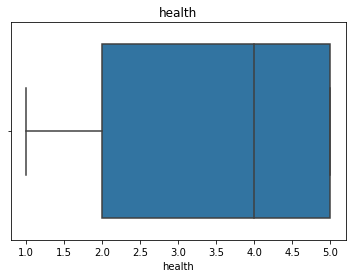

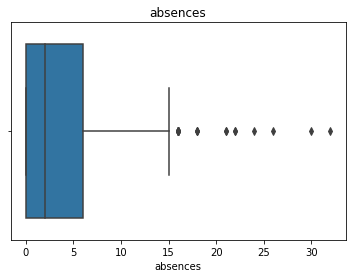

In [9]:
# plot the box plot of the numerical columns
for column in df_por.columns[:-3]:
    # check if the column is numerical
    if df_por[column].dtype == np.dtype('int64') or df_por[column].dtype == np.dtype('float64'):
        sns.boxplot(x=column, data=df_por)
        plt.title(column)
        plt.show()

In [10]:
# plot the correlation between the numerical columns of the math dataframe
df_por.corr().style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


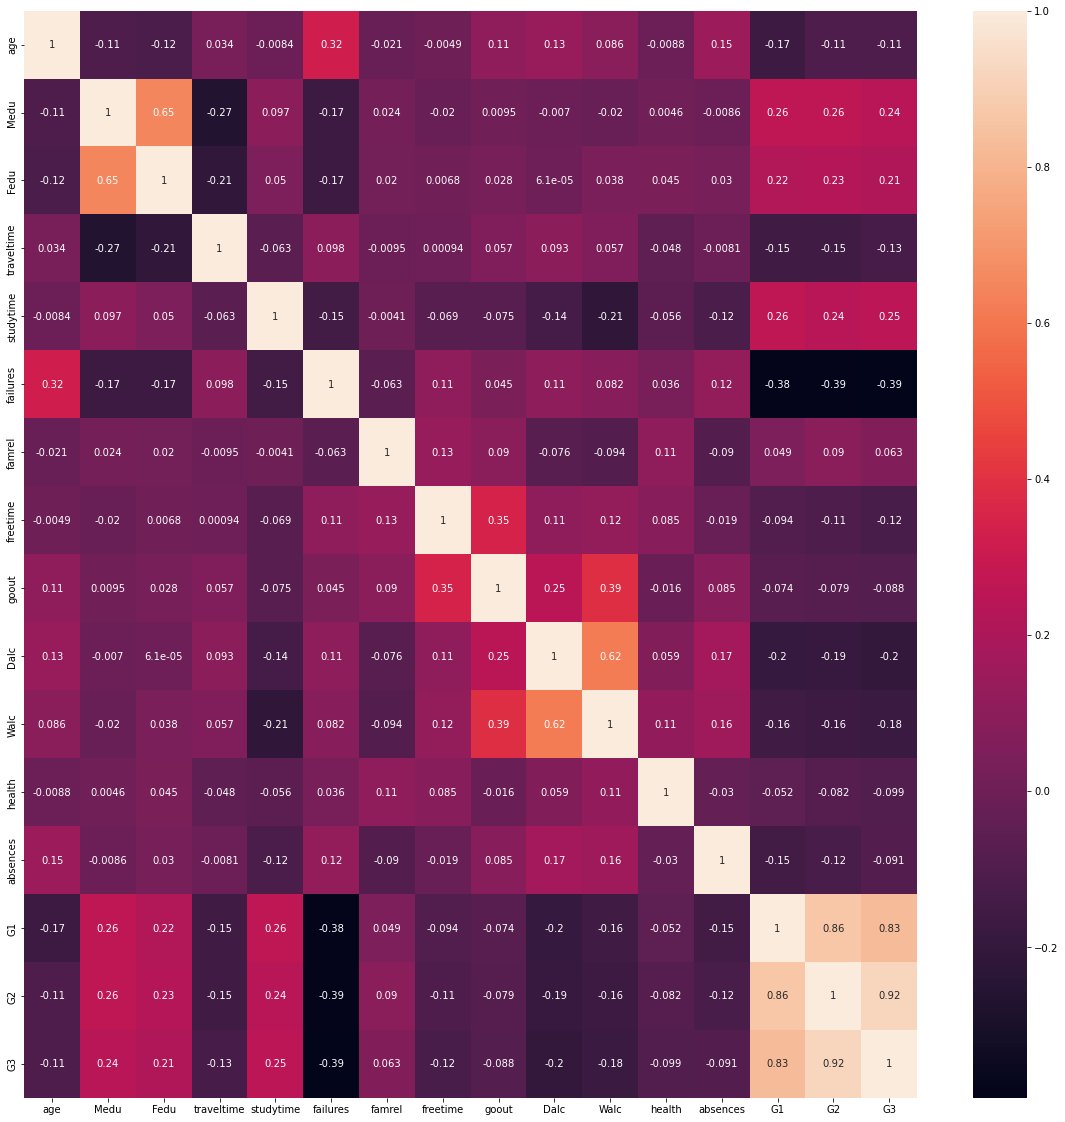

In [11]:
# plot correlation between the numerical columns of the math dataframe using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(df_por.corr(), annot=True)
plt.show()

#scatter plot between G1, G2 and G3

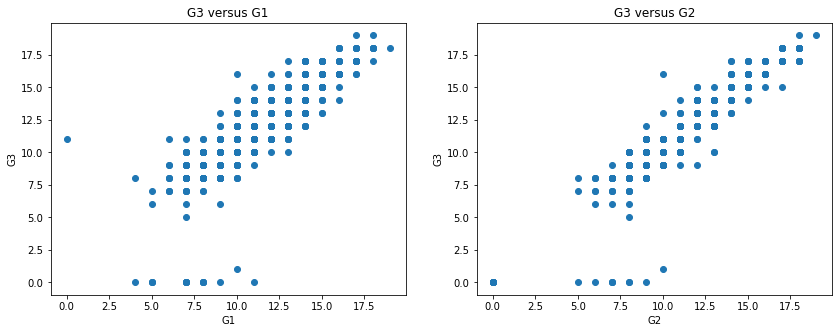

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].scatter(data=df_por, x='G1', y='G3')
axes[0].set_title('G3 versus G1')
axes[0].set_xlabel('G1')
axes[0].set_ylabel('G3')
axes[1].scatter(data=df_por, x='G2', y='G3')
axes[1].set_title('G3 versus G2')
axes[1].set_xlabel('G2')
axes[1].set_ylabel('G3')
plt.show()

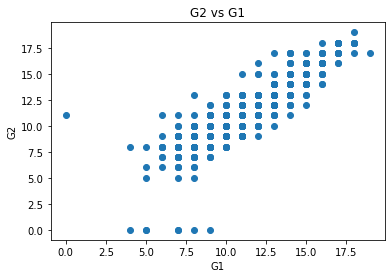

In [13]:
plt.scatter(data=df_por, x='G1', y='G2')
plt.title('G2 vs G1')
plt.xlabel('G1')
plt.ylabel('G2')

plt.show()

### Feature Engineering

#combining the three scores into one score due to the strong correlation between G1, G2, G3

In [14]:
df_por['Total Score'] = df_por['G1'] + df_por['G2'] + df_por['G3']
# drop por_G1, por_G2, por_G3
df_por.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

<AxesSubplot:ylabel='Frequency'>

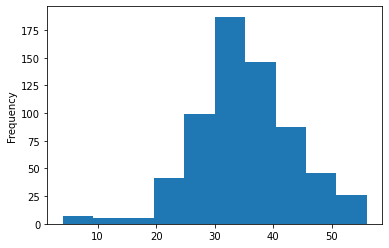

In [15]:
df_por['Total Score'].plot.hist()

#combining the Walc and Dalc into 1 due to high correlation

In [16]:
# combine walc and dalc into one column
df_por['total_alc'] = df_por['Walc'] + df_por['Dalc']
# drop walc and dalc
df_por.drop(['Walc', 'Dalc'], axis=1, inplace=True)

<AxesSubplot:ylabel='Frequency'>

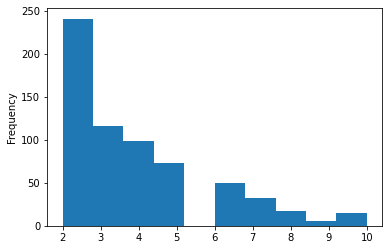

In [17]:
df_por['total_alc'].plot.hist()

In [18]:
# checking feature engineering
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,Total Score,total_alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,4,22,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,2,31,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,6,37,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,0,42,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,0,37,3


#### Data Preprocessing

In [19]:
df_por.shape

(649, 30)

In [20]:
# find the outliers in the numerical columns of the math dataframe by using IQR
for column in df_por.columns[:-1]:
    # check if the column is numerical
    if df_por[column].dtype == np.dtype('int64') or df_por[column].dtype == np.dtype('float64'):
        # find the IQR
        Q1 = df_por[column].quantile(0.25)
        Q3 = df_por[column].quantile(0.75)
        IQR = Q3 - Q1
        # drop the outliers
        df_por.drop(df_por[column][~((df_por[column] >= Q1 - 1.5 * IQR) & (df_por[column] <= Q3 + 1.5 * IQR))].index, inplace=True)


In [21]:
df_por.shape

(406, 30)

In [22]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,Total Score,total_alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,4,22,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,2,31,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,6,37,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,0,42,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,0,37,3


In [23]:
# Scaling numerical columns
scaler = MinMaxScaler()
for column in df_por.columns[:-1]: #  last column as it is the target
    if df_por[column].dtype == np.dtype('int64') or df_por[column].dtype == np.dtype('float64'):
        df_por[column] = scaler.fit_transform(df_por[column].values.reshape(-1, 1))
        

In [24]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,Total Score,total_alc
0,GP,F,0.6,U,GT3,A,1.00,1.00,at_home,teacher,...,yes,no,no,0.5,0.333333,0.75,0.5,0.4,0.00000,2
1,GP,F,0.4,U,GT3,T,0.25,0.25,at_home,other,...,yes,yes,no,1.0,0.333333,0.50,0.5,0.2,0.28125,2
2,GP,F,0.0,U,LE3,T,0.25,0.25,at_home,other,...,yes,yes,no,0.5,0.333333,0.25,0.5,0.6,0.46875,5
3,GP,F,0.0,U,GT3,T,1.00,0.50,health,services,...,yes,yes,yes,0.0,0.000000,0.25,1.0,0.0,0.62500,2
4,GP,F,0.2,U,GT3,T,0.75,0.75,other,other,...,yes,no,no,0.5,0.333333,0.25,1.0,0.0,0.46875,3


In [25]:
# Coverting categorical columns inro numerical representation
for column in df_por.columns[:-1]: # exclude the last column because it is the target
    if df_por[column].dtype == np.dtype('object'):
        df_por[column] = df_por[column].astype('category')
        df_por[column] = df_por[column].cat.codes

In [26]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,Total Score,total_alc
0,0,0,0.6,1,0,0,1.00,1.00,0,4,...,1,0,0,0.5,0.333333,0.75,0.5,0.4,0.00000,2
1,0,0,0.4,1,0,1,0.25,0.25,0,2,...,1,1,0,1.0,0.333333,0.50,0.5,0.2,0.28125,2
2,0,0,0.0,1,1,1,0.25,0.25,0,2,...,1,1,0,0.5,0.333333,0.25,0.5,0.6,0.46875,5
3,0,0,0.0,1,0,1,1.00,0.50,1,3,...,1,1,1,0.0,0.000000,0.25,1.0,0.0,0.62500,2
4,0,0,0.2,1,0,1,0.75,0.75,2,2,...,1,0,0,0.5,0.333333,0.25,1.0,0.0,0.46875,3


### Feature Selection

In [27]:
# correlaton between total score and other numerical columns
score_corr = df_por.corr()['Total Score'].sort_values(ascending=False)
print(score_corr)

Total Score    1.000000
higher         0.268040
studytime      0.265301
Medu           0.217699
address        0.175996
Mjob           0.160749
Fedu           0.151553
internet       0.140664
Fjob           0.114259
reason         0.098636
activities     0.087090
age            0.042741
nursery        0.029299
Pstatus        0.011890
famsup        -0.000743
famrel        -0.002360
famsize       -0.015216
romantic      -0.039276
guardian      -0.052743
goout         -0.068134
paid          -0.076954
sex           -0.084468
traveltime    -0.098740
freetime      -0.107468
schoolsup     -0.109769
health        -0.132160
absences      -0.143764
total_alc     -0.150897
school        -0.176195
failures            NaN
Name: Total Score, dtype: float64


In [28]:
# columns with low correlation with the target variable
low_corr_columns = score_corr[(score_corr < 0.1) & (score_corr > -0.1)].index
low_corr_cols = list(low_corr_columns)
print(low_corr_cols)

['reason', 'activities', 'age', 'nursery', 'Pstatus', 'famsup', 'famrel', 'famsize', 'romantic', 'guardian', 'goout', 'paid', 'sex', 'traveltime']


In [29]:
# removing the columns with low correlation
df_por.drop(low_corr_cols, axis=1, inplace=True)

In [30]:
df_por.head()

,school,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,higher,internet,freetime,health,absences,Total Score,total_alc
0,0,1,1.00,1.00,0,4,0.5,0.0,1,1,0,0.333333,0.5,0.4,0.00000,2
1,0,1,0.25,0.25,0,2,0.5,0.0,0,1,1,0.333333,0.5,0.2,0.28125,2
2,0,1,0.25,0.25,0,2,0.5,0.0,1,1,1,0.333333,0.5,0.6,0.46875,5
3,0,1,1.00,0.50,1,3,1.0,0.0,0,1,1,0.000000,1.0,0.0,0.62500,2
4,0,1,0.75,0.75,2,2,0.5,0.0,0,1,0,0.333333,1.0,0.0,0.46875,3


#### Data Splitting

In [31]:
X = df_por.drop(['Total Score'], axis=1)
y = df_por['Total Score']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

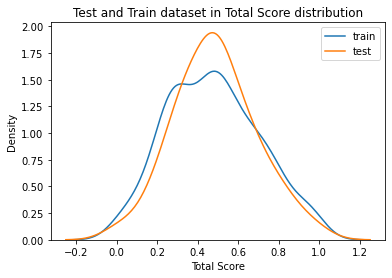

In [33]:
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
plt.legend()
plt.title('Test and Train dataset in Total Score distribution')
plt.show()

### Training the Model

In [34]:
# training the decision tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [35]:
# training the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Evaluating the Model

In [36]:
# decision tree model:training data
y_pred_dt = dt_model.predict(X_train)
dt_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_dt))
dt_train_mae = mean_absolute_error(y_train, y_pred_dt)
print("Decision Tree Training RMSE:", dt_train_rmse)
print("Decision Tree Training MAE:", dt_train_mae)

Decision Tree Training RMSE: 0.19325495910745846
Decision Tree Training MAE: 0.14791326341855576


In [37]:
# decision tree model: on test data
y_pred = dt_model.predict(X_test)
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_test_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree Test RMSE:", dt_test_rmse)
print("Decision Tree Test MAE:", dt_test_mae)

Decision Tree Test RMSE: 0.20261757444953915
Decision Tree Test MAE: 0.15868924890572153


In [38]:
# random forest model: training data
y_pred_rf = rf_model.predict(X_train)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_rf))
rf_train_mae = mean_absolute_error(y_train, y_pred_rf)
print("Random Forest Training RMSE:", rf_train_rmse)
print("Random Forest Training MAE:", rf_train_mae)

Random Forest Training RMSE: 0.08250797871070364
Random Forest Training MAE: 0.06454861111111111


In [39]:
# random forest model: test data
y_pred_rf = rf_model.predict(X_test)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_test_mae = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Test RMSE:", rf_test_rmse)
print("Random Forest Test MAE:", rf_test_mae)

Random Forest Test RMSE: 0.18605941445392107
Random Forest Test MAE: 0.14656631097560976


### Model Performance Comparison

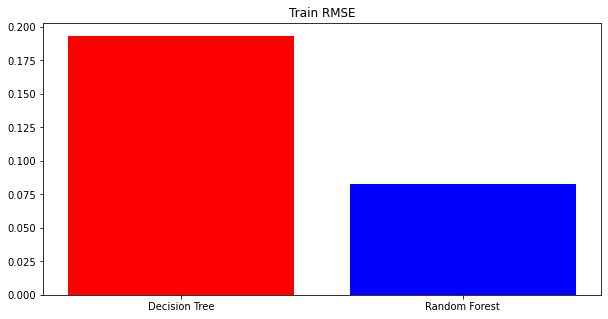

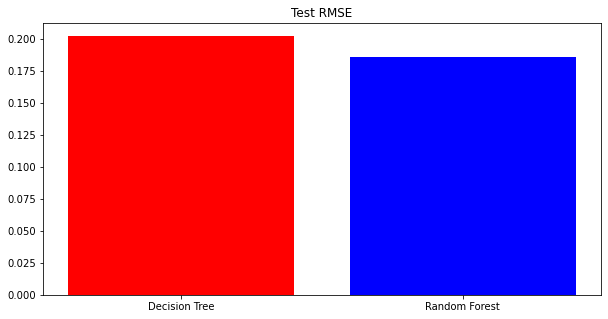

In [40]:
# RMSE comparison
plt.figure(figsize=(10, 5))
plt.bar(['Decision Tree', 'Random Forest'], [dt_train_rmse, rf_train_rmse], color=['red', 'blue'])
plt.title('Train RMSE')
plt.figure(figsize=(10, 5))
plt.bar(['Decision Tree', 'Random Forest'], [dt_test_rmse, rf_test_rmse], color=['red', 'blue'])
plt.title('Test RMSE')
plt.show()

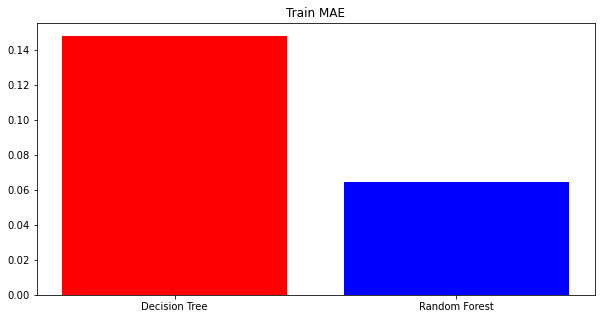

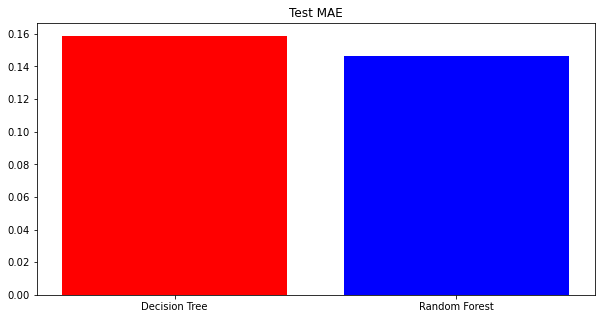

In [41]:
# MAE comparison
plt.figure(figsize=(10, 5))
plt.bar(['Decision Tree', 'Random Forest'], [dt_train_mae, rf_train_mae], color=['red', 'blue'])
plt.title('Train MAE')
plt.figure(figsize=(10, 5))
plt.bar(['Decision Tree', 'Random Forest'], [dt_test_mae, rf_test_mae], color=['red', 'blue'])
plt.title('Test MAE')
plt.show()

### Cross Validation

In [42]:
# 5 fold cross validation of the decision tree model
tree_rmse = []
tree_mae = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    dt_model.fit(X_train_fold, y_train_fold)
    y_pred = dt_model.predict(X_test_fold)
    tree_rmse.append(np.sqrt(mean_squared_error(y_test_fold, y_pred)))
    tree_mae.append(mean_absolute_error(y_test_fold, y_pred))

# print the mean of the 5 fold cross validation
print("Decision Tree Model:")
print("Root Mean Square Error:", np.mean(tree_rmse))
print("Mean Absolute Error:", np.mean(tree_mae))

Decision Tree Model:
Root Mean Square Error: 0.2478014083364005
Mean Absolute Error: 0.19699524280821987


In [43]:
# 5 fold cross validation of the random forest model
rf_rmse = []
rf_mae = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    rf_model.fit(X_train_fold, y_train_fold)
    y_pred = rf_model.predict(X_test_fold)
    rf_rmse.append(np.sqrt(mean_squared_error(y_test_fold, y_pred)))
    rf_mae.append(mean_absolute_error(y_test_fold, y_pred))

# print the mean of the 5 fold cross validation results
print("Random Forest Model:")
print("Root Mean Square Error:", np.mean(rf_rmse))
print("Mean Absolute Error:", np.mean(rf_mae))

Random Forest Model:
Root Mean Square Error: 0.21902157883856482
Mean Absolute Error: 0.1736814152644231


#Random Forest Performing better than Decision Tree model.

### Hyper-Parameter Optimization


In [44]:
# find the optimal hyperparameters for the random forest model by using random search
# define the parameters for the random search
param_dist = {
    'n_estimators': list(range(10, 100,10)),
    'max_depth': list(range(1, 10)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 10)),
    'bootstrap': [True, False]
}

rf_reg = RandomForestRegressor()
rf_random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, random_state=42)
rf_random_search.fit(X_train, y_train)
print("Random Forest Model:")
print("Best Parameters:", rf_random_search.best_params_)
print("Best Score:", rf_random_search.best_score_)
print("Best Estimator:", rf_random_search.best_estimator_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=9, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=9, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=9, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=9, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=2, min_samples_split=9, n_estimators=80; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=3, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END boots

In [45]:
# evaluate the random forest model on test data
y_pred_rf = rf_random_search.best_estimator_.predict(X_test)
rf_test_rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_test_mae_best = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Test RMSE:", rf_test_rmse_best)
print("Random Forest Test MAE:", rf_test_mae_best)

Random Forest Test RMSE: 0.17746596584891652
Random Forest Test MAE: 0.13827804809942737


In [46]:
# hyperparameter tuning for the decision tree model
param_dist = {
    'max_depth': list(range(1, 100)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 10)),
}

dt_reg = DecisionTreeRegressor()
dt_random_search = RandomizedSearchCV(estimator=dt_reg, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, random_state=42)
dt_random_search.fit(X_train, y_train)
print("Decision Tree Model:")
print("Best Parameters:", dt_random_search.best_params_)
print("Best Score:", dt_random_search.best_score_)
print("Best Estimator:", dt_random_search.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=12, min_samples_leaf=9, min_samples_split=6; total time=   0.0s
[CV] END max_depth=12, min_samples_leaf=9, min_samples_split=6; total time=   0.0s
[CV] END max_depth=12, min_samples_leaf=9, min_samples_split=6; total time=   0.0s
[CV] END max_depth=12, min_samples_leaf=9, min_samples_split=6; total time=   0.0s
[CV] END max_depth=12, min_samples_leaf=9, min_samples_split=6; total time=   0.0s
[CV] END max_depth=75, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END max_depth=75, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END max_depth=75, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END max_depth=75, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END max_depth=75, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END max_depth=73, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END max_depth=73, min

In [47]:
# evaluating the decision tree model on test data
y_pred_dt = dt_random_search.best_estimator_.predict(X_test)
dt_test_rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_test_mae_best = mean_absolute_error(y_test, y_pred_dt)
print("Decision Tree Test RMSE:", dt_test_rmse_best)
print("Decision Tree Test MAE:", dt_test_mae_best)

Decision Tree Test RMSE: 0.21235989646404524
Decision Tree Test MAE: 0.16779907772190544


#### Performance Comparison between Tuned and Untuned Models

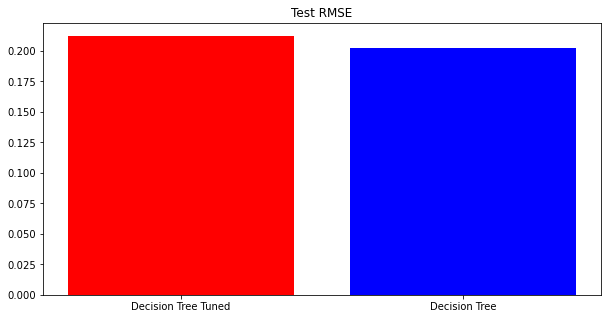

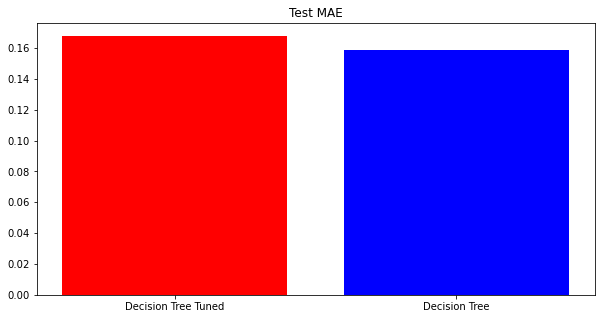

In [48]:
# RMSE and MAE for the decision tree model
plt.figure(figsize=(10, 5))
plt.bar(['Decision Tree Tuned', 'Decision Tree'], [dt_test_rmse_best, dt_test_rmse], color=['red', 'blue'])
plt.title('Test RMSE')
plt.figure(figsize=(10, 5))
plt.bar(['Decision Tree Tuned', 'Decision Tree'], [dt_test_mae_best, dt_test_mae], color=['red', 'blue'])
plt.title('Test MAE')
plt.show()

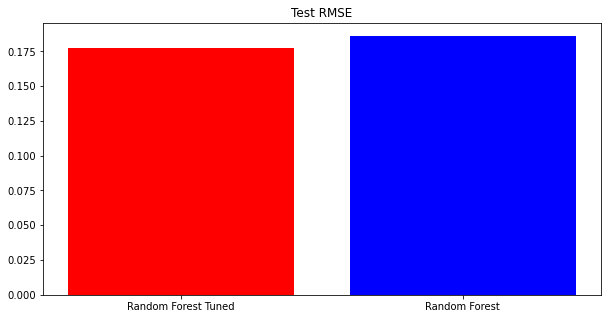

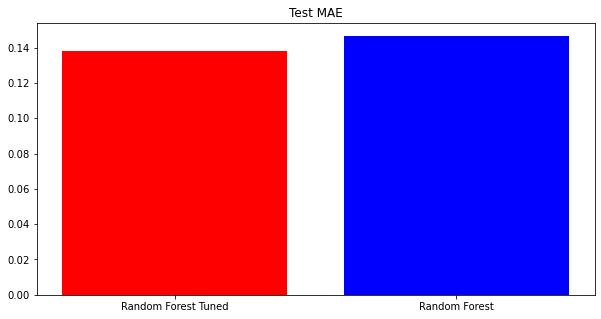

In [49]:
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest Tuned', 'Random Forest'], [rf_test_rmse_best, rf_test_rmse], color=['red', 'blue'])
plt.title('Test RMSE')
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest Tuned', 'Random Forest'], [rf_test_mae_best, rf_test_mae], color=['red', 'blue'])
plt.title('Test MAE')
plt.show()

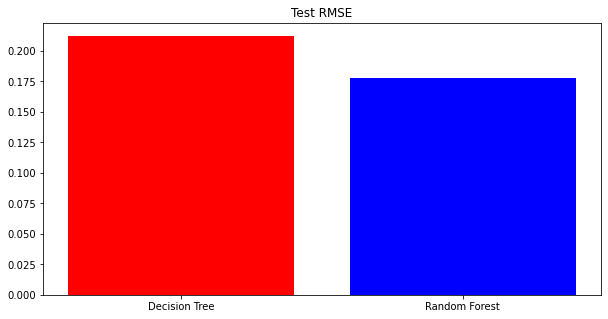

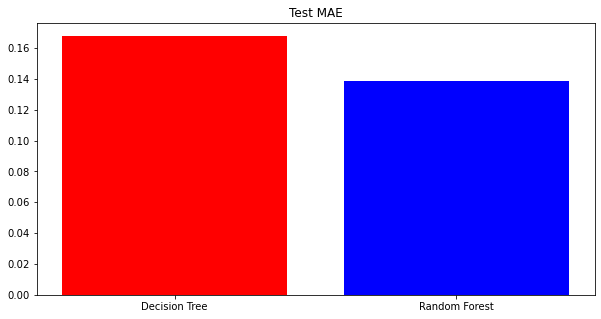

In [50]:
plt.figure(figsize=(10, 5))
# RMSE comparison
plt.bar(['Decision Tree', 'Random Forest'], [dt_test_rmse_best, rf_test_rmse_best], color=['red', 'blue'])
plt.title('Test RMSE')
plt.figure(figsize=(10, 5))
# MAE comparison
plt.bar(['Decision Tree', 'Random Forest'], [dt_test_mae_best, rf_test_mae_best], color=['red', 'blue'])
plt.title('Test MAE')
plt.show()

*We can see that the random forest performs better than the decision tree.*